# assignment1_1：复现课堂代码Syntax Tree and Probability Model

## 1 给定一个语法，怎么样生成一个语法
eg: two number: 一个number后面跟着一个number

### 1.1 简单two_nums实现

In [1]:
import random

two_number = """
2_num => num num
num => 0 | 1 | 2 | 3 | 4 
"""

def two_num():
    return num() + num()
def num():
    return random.choice("0 | 1 | 2 | 3 | 4 ".split('|'))

In [2]:
num()

' 4 '

In [3]:
two_num()

' 2  3 '

### 1.2 nums进阶

In [4]:
two_number = """
numbers => num numbers | num
num => 0 | 1 | 2 | 3 | 4 
"""

In [5]:
def numbers():
    if random.random() < 0.5:
        return num()
    else:
        return num() + numbers()

In [6]:
numbers()

' 4  3  4  1  4 '

## 2 基于语法规则简单中文实现


### 2.1 简单名词，动词短语组合

In [109]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun  
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [110]:
import random

def adj():
    return random.choice("蓝色的 | 好看的 | 小小的".split("|")).split()[0]

def adj_star():
    return random.choice([lambda : '', lambda : adj() + adj_star()])()

In [111]:
adj()

'蓝色的'

In [112]:
adj_star()

'好看的小小的小小的蓝色的'

### 2.2 nums进阶-多语法
使运算符号变化的时候，程序不用变

In [113]:
two_number_add = """
two => num + num 
num => 0 | 1 | 2 | 3 | 4
"""
two_number_op = """
two => num + num | num - num
num => 0 | 1 | 2 | 3 | 4
"""

def generate_grammar(grammar_str: str, target, split='=>'):
    grammar = dict()
  
    for line in grammar_str.split('\n'):
        # 判断是否为空  
        if not line: 
            continue
        # two => num + num
        expression, formula = line.split(split) # 返回表达式以及对应的语法
        formulas = formula.split('|')
        formulas = [f.split() for f in formulas]
        grammar[expression.strip()] = formulas # 此处为dict类型，key:two, value:formulas
        # eg:{'two ': [['num', '+', 'num'], ['num', '-', 'num']], 'num ': [['0'], ['1'], ['2'], ['3'], ['4']]}
        print(expression,":",  formulas)
    print(grammar)
    return grammar

In [114]:
generate_grammar = generate_grammar(two_number_op, target="two")

two  : [['num', '+', 'num'], ['num', '-', 'num']]
num  : [['0'], ['1'], ['2'], ['3'], ['4']]
{'two': [['num', '+', 'num'], ['num', '-', 'num']], 'num': [['0'], ['1'], ['2'], ['3'], ['4']]}


In [115]:
choice_a_expr = random.choice

def generate_by_grammar(grammar: dict, target:str):
    # 测试target是否是一个key
    if target not in grammar:
        return target
    expr = choice_a_expr(grammar[target]) # 选择value中的一个list, eg:['num', '+', 'num']
    print("expr", expr)
    return ' '.join(generate_by_grammar(grammar, t) for t in expr)

In [116]:
generate_by_grammar(generate_grammar, "two")

expr ['num', '-', 'num']
expr ['2']
expr ['1']


'2 - 1'

**上述代码汇总一下**

In [117]:
two_number_add = """
two => num + num 
num => 0 | 1 | 2 | 3 | 4
"""
number_ops = """
expression => expression num_op | num_op
num_op => num op num
op => + | - | * | /
num => 0 | 1 | 2 | 3 | 4
"""

def generate_grammar(grammar_str: str, target, split='=>'):
    grammar = dict()  
    for line in grammar_str.split('\n'):
        # 判断是否为空  
        if not line: 
            continue
        # two => num + num
        expression, formula = line.split(split) # 返回表达式以及对应的语法
        formulas = formula.split('|')
        formulas = [f.split() for f in formulas]
        grammar[expression.strip()] = formulas # 此处为dict类型，key:two, value:formulas
        # eg:{'two ': [['num', '+', 'num'], ['num', '-', 'num']], 'num ': [['0'], ['1'], ['2'], ['3'], ['4']]}
        print(expression,":",  formulas)
    return grammar

choice_a_expr = random.choice

def generate_by_grammar(grammar: dict, target:str):
    # 测试target是否是一个key
    if target not in grammar:
        return target
    expr = choice_a_expr(grammar[target]) # 选择value中的一个list, eg:['num', '+', 'num']
    print("expr", expr)
    return ' '.join(generate_by_grammar(grammar, t) for t in expr)

def generate_by_str(grammar_str, split, target):
    grammar = generate_grammar(grammar_str, target, split)
    return generate_by_grammar(grammar,target)

generate_by_str(number_ops, split='=>', target="expression")


expression  : [['expression', 'num_op'], ['num_op']]
num_op  : [['num', 'op', 'num']]
op  : [['+'], ['-'], ['*'], ['/']]
num  : [['0'], ['1'], ['2'], ['3'], ['4']]
expr ['expression', 'num_op']
expr ['expression', 'num_op']
expr ['num_op']
expr ['num', 'op', 'num']
expr ['1']
expr ['/']
expr ['0']
expr ['num', 'op', 'num']
expr ['0']
expr ['-']
expr ['4']
expr ['num', 'op', 'num']
expr ['1']
expr ['/']
expr ['3']


'1 / 0 0 - 4 1 / 3'

### 2.3 中文语句生成case1

In [163]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""

#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""
opinion = """
opinion = 电影名称 标点符号 副词 形容词 标点符号
电影名称 = 湄公河行动 | 战狼 | 唐顿庄园 | 哈利波特
副词 = 很 | 颇 | 极 | 十分
形容词 = 燃 | 还不错 | 难看 
标点符号 = 。| !
"""

In [164]:
# 随机生成10句
for i in range(10):    
    print(generate_by_str(human, split='=', target="human"))

human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找', '活动']
expr ['我们']
expr ['想找点']
expr ['乐子']
我们 想找点 乐子
human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找', '活动']
expr ['我']
expr ['找找']
expr ['乐子']
我 找找 乐子
human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找', '活动']
expr ['我']
expr ['想找点']
expr ['乐子']
我 想找点 乐子
human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找', '活动']
expr ['我们']
expr ['想找点']
expr ['乐子']
我们 想找点 乐子
human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找', '活动']
expr ['我们']
expr ['找找']
expr ['乐子']
我们 找找 乐子
human  : [['自己', '寻找', '活动']]
自己  : [['我'], ['俺'], ['我们']]
寻找  : [['找找'], ['想找点']]
活动  : [['乐子'], ['玩的']]
expr ['自己', '寻找',

### 2.4 中文语句生成case2-host

In [165]:
# 随机生成10句
for i in range(10):    
    print(generate_by_str(host, split='=', target="host"))

host  : [['寒暄', '报数', '询问', '业务相关', '结尾']]
报数  : [['我是', '数字', '号', ',']]
数字  : [['单个数字'], ['数字', '单个数字']]
单个数字  : [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]
寒暄  : [['称谓', '打招呼'], ['打招呼']]
称谓  : [['人称', ',']]
人称  : [['先生'], ['女士'], ['小朋友']]
打招呼  : [['你好'], ['您好']]
询问  : [['请问你要'], ['您需要']]
业务相关  : [['玩玩', '具体业务']]
玩玩  : [['null']]
具体业务  : [['喝酒'], ['打牌'], ['打猎'], ['赌博']]
结尾  : [['吗？']]
expr ['寒暄', '报数', '询问', '业务相关', '结尾']
expr ['打招呼']
expr ['您好']
expr ['我是', '数字', '号', ',']
expr ['单个数字']
expr ['4']
expr ['请问你要']
expr ['玩玩', '具体业务']
expr ['null']
expr ['打牌']
expr ['吗？']
您好 我是 4 号 , 请问你要 null 打牌 吗？
host  : [['寒暄', '报数', '询问', '业务相关', '结尾']]
报数  : [['我是', '数字', '号', ',']]
数字  : [['单个数字'], ['数字', '单个数字']]
单个数字  : [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]
寒暄  : [['称谓', '打招呼'], ['打招呼']]
称谓  : [['人称', ',']]
人称  : [['先生'], ['女士'], ['小朋友']]
打招呼  : [['你好'], ['您好']]
询问  : [['请问你要'], ['您需要']]
业务相关  : [['玩玩', '具体业务']]
玩玩  : [['null']]
具体业务  : [['喝酒'], ['打

In [167]:
opinion2 = """
opinion = 时间 地点 影院 电影名称 副词 形容词
时间 = 年 月 日
年 = 数字 年
月 = 数字 月
日 = 数字 日
数字 = 1 | 2 | 3 | 4
地方 = 南京 | 上海 | 广东
影院 = 卢米埃影城 | 幸福蓝海国际影城 | 时代华纳影城
电影名称 = 湄公河行动 | 战狼 | 唐顿庄园 | 哈利波特
副词 = 很 | 颇 | 极 | 十分
形容词 = 燃 | 好看 | 难看 
"""
# 随机生成10句
for i in range(10):    
    print(generate_by_str(opinion2, split='=', target="opinion"))

opinion  : [['时间', '地点', '影院', '电影名称', '副词', '形容词']]
时间  : [['年', '月', '日']]
年  : [['数字', '年']]
月  : [['数字', '月']]
日  : [['数字', '日']]
数字  : [['1'], ['2'], ['3'], ['4']]
地方  : [['南京'], ['上海'], ['广东']]
影院  : [['卢米埃影城'], ['幸福蓝海国际影城'], ['时代华纳影城']]
电影名称  : [['湄公河行动'], ['战狼'], ['唐顿庄园'], ['哈利波特']]
副词  : [['很'], ['颇'], ['极'], ['十分']]
形容词  : [['燃'], ['好看'], ['难看']]
expr ['时间', '地点', '影院', '电影名称', '副词', '形容词']
expr ['年', '月', '日']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['3']
expr ['数字', '年'

expr ['2']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['4']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['1']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['2']
expr ['数字', '年']
expr ['3']
expr ['数字', '年']
expr ['2']
expr ['数字

RecursionError: maximum recursion depth exceeded while calling a Python object

### 2.5 小结
- 语法可以通过定义最简单的函数实现
- 可以通过递归实现更复杂的问题
- Eliza 推出的第一款，就是基于规则引擎。data driven --> procedure driven. 人们后来开始思考，从数据着手，数据控制，具体的细节人不需要去考虑.未来的考虑都是从问题变了，但是程序没有变着手。
    ```
    machine learning 
    based on statical data driven way
    ```
- 规则引擎：输入的规则变了，但是程序不用变


## 3 语法学习

### 3.1 lambda函数
Python中，lambda函数也叫匿名函数，及即没有具体名称的函数，它允许快速定义单行函数，类似于C语言的宏，可以用在任何需要函数的地方。这区别于def定义的函数。
lambda与def的区别：
    1）def创建的方法是有名称的，而lambda没有。
    2）lambda会返回一个函数对象，但这个对象不会赋给一个标识符，而def则会把函数对象赋值给一个变量（函数名）。
    3）lambda只是一个表达式，而def则是一个语句。
    4）lambda表达式” : “后面，只能有一个表达式，def则可以有多个。
    5）像if或for或print等语句不能用于lambda中，def可以。
    6）lambda一般用来定义简单的函数，而def可以定义复杂的函数。
    6）lambda函数不能共享给别的程序调用，def可以。
lambda语法格式：
lambda 变量 : 要执行的语句
~~~
lambda [arg1 [, agr2,.....argn]] : expression
~~~


In [121]:
# 单个函数
g = lambda x : x ** 2

In [122]:
print(g(3))

9


In [123]:
# 多个函数
g = lambda x, y, z : (x+y)**z
print(g(1,2,3))

27


In [124]:
# 返回一个函数对象
list_a = [lambda a : a ** 3, lambda b : b**3]
list_a[1](2)

8

### 3.2 random.choice用法
~~~
import random

random.choice( seq  )

seq: 可以是一个列表/元组/字符串
~~~

## 4 语言模型
- 李开复读博的时候，研究的是语言模型


### 4.1 review
- 条件概率
- 独立概率
```
365天，迟到30次
Pr(迟到) = 30/365
365天，拉肚子60次，其中20次迟到
Pr(迟到|拉肚子) = 20/60 = Pr(迟到&拉肚子) / Pr(拉肚子)
                      = (20/365) / (60/365)
                      = 20/60
Pr(迟到|伊利发生车祸) = Pr(你迟到)   
                   = Pr(迟到&伊利发生车祸)/Pr（伊利发生车祸）
                   = Pr(迟到）* Pr（伊利发生车祸）/Pr（伊利发生车祸）
Pr(迟到|肚子痛&伊利发生车祸) = Pr(你迟到|肚子痛)
                         = Pr(你迟到&肚子痛) / Pr(肚子痛)
                         ～ Count(你迟到且肚子痛) / Count(肚子痛)
```                       
PS ： 其实就和随机森林原理一样
```
假设只和最近的有关系

-> Pr(其实&就和&随机森林&原理&一样)
-> Pr(其实|就和&随机森林&原理&一样)Pr(就和&随机森林&原理&一样)
-> Pr(其实|就和)Pr(就和|随机森林&原理&一样)Pr(随机森林&原理&一样)
-> Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林&原理&一样)
-> Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林|原理&一样)Pr(原理&一样)
-> Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林|原理)Pr(原理&一样)
-> Pr(其实|就和)Pr(就和|随机森林)Pr(随机森林|原理)Pr(原理|一样)Pr(一样)
```

$$ Pr(其实|就和) = \frac{\#其实就和}{\#就和}$$ （#：表示数量）

$$ Pr(W_1|W_2) = \frac{\#W_1W_2}{\#W_2}$$ 

进一步抽象
$$ Pr(sentence) = Pr(w_1w_2w_3w_4) = \prod_i^{n} \frac{\#W_iW_{i+1}}{\# W_{i+1}} * Pr(W_n)$$ 

In [125]:
import random
random.choice(range(100))

69

In [17]:
filename = "../../data/sqlResult_1558435.csv"

#### 数据日后会经常用

In [18]:
import pandas as pd

In [19]:
content = pd.read_csv(filename, encoding='gb18030')

In [20]:
content.head()

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm
2,89615,NaN,快科技@http://www.kkj.cn/,此前的一加3T搭载的是3400mAh电池，DashCharge快充规格为5V/4A。\r\n...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""18""...",一加手机5细节曝光：3300mAh、充半小时用1天,http://www.cnbeta.com/articles/tech/623601.htm
3,89614,NaN,新华社,这是6月18日在葡萄牙中部大佩德罗冈地区拍摄的被森林大火烧毁的汽车。新华社记者张立云摄\r\n,"{""type"":""国际新闻"",""site"":""环球"",""commentNum"":""0"",""j...",葡森林火灾造成至少62人死亡 政府宣布进入紧急状态（组图）,http://world.huanqiu.com/hot/2017-06/10866126....
4,89613,胡淑丽_MN7479,深圳大件事,（原标题：44岁女子跑深圳约会网友被拒，暴雨中裸身奔走……）\r\n@深圳交警微博称：昨日清...,"{""type"":""新闻"",""site"":""网易热门"",""commentNum"":""978"",...",44岁女子约网友被拒暴雨中裸奔 交警为其披衣相随,http://news.163.com/17/0618/00/CN617P3Q0001875...


####  * 常见编码错误
~~~
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xba in position 0: invalid start byte
~~~
- chardet声称是可以自动判断编码，但是实际经常会判断错
- 解决方法： 搜索🔍 python encoding <https://docs.python.org/2.4/lib/standard-encodings.html>


#### 数据预处理
含有很多不是文字，空格等，使用正则表达式

In [21]:
articles = content['content'].tolist()

In [22]:
len(articles)

89611

In [23]:
articles[0] # 存在很多特殊符号,进行预处理

'此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/体验版内测，稳定版暂不受影响），以确保工程师可以集中全部精力进行系统优化工作。有人猜测这也是将精力主要用到MIUI 9的研发之中。\r\nMIUI 8去年5月发布，距今已有一年有余，也是时候更新换代了。\r\n当然，关于MIUI 9的确切信息，我们还是等待官方消息。\r\n'

In [24]:
import re

def token(string):
    return re.findall('\w+', string) #  \w+： 匹配包括下划线的任何单词字符

```
\w 匹配词语字符
对于 Unicode (str) 样式：
匹配Unicode词语的字符，包含了可以构成词语的绝大部分字符，也包括数字和下划线。如果设置了 ASCII 标志，就只匹配 [a-zA-Z0-9_] 。
对于8位(bytes)样式：
匹配ASCII字符中的数字和字母和下划线，就是 [a-zA-Z0-9_] 。如果设置了 LOCALE 标记，就匹配当前语言区域的数字和字母和下划线。
```

In [25]:
token(articles[0])

['此外',
 '自本周',
 '6月12日',
 '起',
 '除小米手机6等15款机型外',
 '其余机型已暂停更新发布',
 '含开发版',
 '体验版内测',
 '稳定版暂不受影响',
 '以确保工程师可以集中全部精力进行系统优化工作',
 '有人猜测这也是将精力主要用到MIUI',
 '9的研发之中',
 'MIUI',
 '8去年5月发布',
 '距今已有一年有余',
 '也是时候更新换代了',
 '当然',
 '关于MIUI',
 '9的确切信息',
 '我们还是等待官方消息']

In [ ]:
!pip install jieba

#### * pip配置文件出现问题
解决： 使用本地编辑器打开，重新编辑文本，

In [26]:
import jieba
list(jieba.cut('结巴分词好好啊后 i 啊手 i后打哦电话撒'))

['结巴',
 '分词',
 '好好',
 '啊',
 '后',
 ' ',
 'i',
 ' ',
 '啊',
 '手',
 ' ',
 'i',
 '后',
 '打',
 '哦',
 '电话',
 '撒']

In [27]:
''.join(token(articles[110]))

'在外国名著麦田里的守望者中作者想要守护麦田里如自己内心一般纯真的孩子们而驻村干部们也在这个炎热的夏天里撸袖子上阵真正做起了村民们的麦田守望者三夏时节不等人你看到了吗不停翻涌起伏仿若铺陈至天边的金黄麦浪中那若隐若现的人影是自治区新闻出版广电局驻和田市肖尔巴格乡合尼村工作队的队员与工作队组织的青年志愿者在这个炎热的夏季他们深入田间地头帮助村民们收割小麦扛起收麦机麦田中的每个人都显得兴致勃勃一天下来就近22亩小麦收割完毕志愿者麦麦提亚森擦去满脸的汗水高兴地告诉驻村队员我们青年志愿者应该多做贡献为村里的脱贫致富出把力工作队带着我们为村里的老人服务看到那些像我爷爷奶奶一样的老人赞许感谢的目光我体会到了帮助他人的快乐自治区新闻出版广电局驻村工作队孙敏艾力依布拉音麦收时节我们在一起6月中旬的和田墨玉麦田金黄静待收割6月14日15日两天自治区高级人民法院驻和田地区墨玉县吐外特乡罕勒克艾日克村工作队与48名村民志愿者一道帮助村里29户有需要的村民进行小麦收割工作田间地头罕勒克艾日克村志愿队的红旗迎风飘扬格外醒目10余台割麦机一起轰鸣男人们在用机器收割小麦的同时几名妇女也加入到志愿队构成了一道美丽的麦收风景休息空闲工作队员和村民们坐在树荫下田埂上互相问好聊天语言交流有困难就用手势动作比划着聊天有趣地交流方式不时引来阵阵欢笑大家在一同享受丰收和喜悦也一同增进着彼此的情感和友谊自治区高级人民法院驻村工作队周春梅艾地艾木阿不拉细看稻菽千重浪6月15日自治区煤田灭火工程局的干部职工们再一次跋涉1000多公里来到了叶城县萨依巴格乡阿亚格欧尔达贝格村见到了自己的亲戚现场处处都透出掩盖不住的喜悦一声声亲切的谢谢一个个结实的拥抱都透露出浓浓的亲情没坐一会儿在嘘寒问暖中大家了解到在麦收的关键时刻部分村民家中却存在收割难的问题小麦成熟期短收获的时间集中天气的变化对小麦最终产量的影响极大如果不能及时收割会有不小损失的于是大家几乎立刻就决定要帮助亲戚们收割麦子在茂密的麦地里干部们每人手持一把镰刀一字排开挽起衣袖卷起裤腿挥舞着镰刀进行着无声的竞赛骄阳似火汗如雨下但这都挡不住大家的热情随着此起彼伏的镰刀割倒麦子的刷刷声响不一会一束束沉甸甸的麦穗就被整齐地堆放了起来当看到自己亲手收割的金黄色麦穗被一簇簇地打成捆运送到晒场每个人的脸上都露出了灿烂的笑容自治区煤田灭火工程局驻村工作队马浩南这是一个收获多多的季节6月1

In [28]:
articles_clean = [''.join(token(str(a)))for a in articles]

In [38]:
len(articles_clean)

89611

！把重要的信息保存起来

In [34]:
with open('article_9k.txt', 'w') as f:
    for a in articles_clean:
        f.write(a + '\n')    

In [35]:
!ls

article_9k.txt                         assignment1_3-编程实战.ipynb
assignment1_1-课堂内容复现.ipynb


In [36]:
def cut(string): return list(jieba.cut(string))

In [37]:
Token = []

In [38]:
Token = cut(open('article_9k.txt').read())

In [44]:
print(type(Token))
for i in range(10):
    print(Token[i])


<class 'list'>
此外
自
本周
6
月
12
日起
除
小米
手机


In [52]:
# 将token保存到dict在存储起来
line_dict = {}
with open('article_9k_cut.txt', 'w') as f:
    for i, line in enumerate(Token):
        line_dict[i] = line
    f.write(str(line_dict))
print(line_dict[2])

本周


In [45]:
for i, line in enumerate((open('article_9k.txt'))):
    if i % 100 == 0:
        print(i)
    if i > 10000:
        break
    Token += cut(line)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000


In [ ]:
with_jieba_cut = Counter(jieba.cut(articles[110]))

In [ ]:
from functools import reduce

In [33]:
from collections import Counter

#### operator: python内置运算符

In [54]:
from operator import add, mul

#### functools:
Python 高阶函数相关的函数
```
这个 functools.reduce 就是 Python 2 内建库中的 reduce，它之所以出现在这里就是因为 Guido 的独裁，他并不喜欢函数式编程中的“map-reduce”概念，因此打算将 map 和 reduce 两个函数移出内建函数库，最后在社区的强烈反对中将 map 函数保留在了内建库中， 但是 Python 3 内建的 map 函数返回的是一个迭代器对象，而 Python 2 中会 eagerly 生成一个 list，使用时要多加注意。
该函数的作用是将一个序列归纳为一个输出，其原型如下：
reduce(function, sequence, startValue)
```
复制代码使用示例：
~~~
>>> def foo(x, y):
...     return x + y
...
>>> l = range(1, 10)
>>> reduce(foo, l)
45
>>> reduce(foo, l, 10)
55
~~~

In [64]:
from functools import reduce

In [55]:
words_count = Counter(Token)

In [57]:
words_count.most_common(100) # 出现频率最高的100个单词

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909),
 ('\n', 89611),
 ('１', 88187),
 ('０', 84945),
 ('外代', 83268),
 ('中', 73926),
 ('中国', 71179),
 ('２', 70521),
 ('2017', 69894),
 ('记者', 62147),
 ('二线', 61998),
 ('将', 61420),
 ('与', 58309),
 ('等', 58162),
 ('为', 57019),
 ('5', 54578),
 ('照片', 52271),
 ('4', 51626),
 ('对', 50317),
 ('上', 47452),
 ('也', 47401),
 ('有', 45767),
 ('５', 40857),
 ('说', 39017),
 ('发展', 37632),
 ('他', 37194),
 ('３', 36906),
 ('以', 36867),
 ('国际', 35842),
 ('nn', 35330),
 ('４', 34659),
 ('比赛', 32232),
 ('６', 30575),
 ('到', 30109),
 ('人', 29572),
 ('从', 29489),
 ('6', 29002),
 ('都', 28027),
 ('不', 27963),
 ('后', 27393),
 ('当日', 27186),
 ('就', 26684),
 ('并', 26568),
 ('国家', 26439),
 ('７', 26386),
 ('企业', 26147),
 ('进行', 25987),
 ('3', 25491),
 ('美国', 25485),
 ('举行', 25389),
 ('被', 25277),
 ('北京', 25245),
 ('体育', 24873),
 ('2', 24376),
 ('1', 24182),
 ('这', 

In [58]:
len(Token)

17618254

In [67]:
reduce(add, [1, 2, 3, 4, 5, 6])

21

In [69]:
[1, 2, 3] + [3, 43, 5]

[1, 2, 3, 3, 43, 5]

In [70]:
frequiences = [f for w, f in words_count.most_common(100)]

In [71]:
frequiences

[703716,
 382020,
 263597,
 189330,
 166300,
 142462,
 134061,
 123106,
 121938,
 100909,
 89611,
 88187,
 84945,
 83268,
 73926,
 71179,
 70521,
 69894,
 62147,
 61998,
 61420,
 58309,
 58162,
 57019,
 54578,
 52271,
 51626,
 50317,
 47452,
 47401,
 45767,
 40857,
 39017,
 37632,
 37194,
 36906,
 36867,
 35842,
 35330,
 34659,
 32232,
 30575,
 30109,
 29572,
 29489,
 29002,
 28027,
 27963,
 27393,
 27186,
 26684,
 26568,
 26439,
 26386,
 26147,
 25987,
 25491,
 25485,
 25389,
 25277,
 25245,
 24873,
 24376,
 24182,
 24118,
 23828,
 23385,
 23229,
 23081,
 22554,
 22134,
 22006,
 21940,
 21932,
 21920,
 21861,
 21567,
 21045,
 20946,
 20882,
 20837,
 20701,
 20700,
 20658,
 19986,
 19982,
 19001,
 18978,
 18907,
 18634,
 18609,
 18384,
 18159,
 17760,
 17750,
 17424,
 17421,
 17338,
 17275,
 17260]

In [72]:
x = [i for i in range(100)]

In [74]:
x

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

#### %matplotlib inline 可以在Ipython编译器里直接使用，功能是可以内嵌绘图，并且可以省略掉plt.show()这一步

In [ ]:
%matplotlib inline

In [75]:
import matplotlib.pyplot as plt

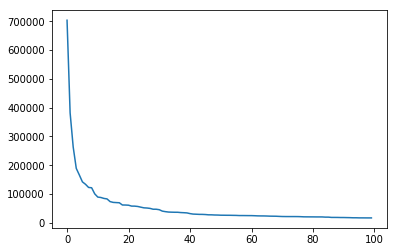

In [76]:
plt.plot(x, frequiences)

## 小结
- AI的问题中，65%都是在做数据预处理
- 养成一个习惯，就是把重要的信息，及时保存起来，存在硬盘里
- NLP重要规律， 在一个很大的text, 出现频率第二多的单词，是出现频率第一多的1/2，出现频率第n多的频率, 是出现频率最多的1/n

In [77]:
import numpy as np

$$ Pr(sentence) = Pr(w_1w_2w_3w_4) = \prod_i^{n} \frac{\#W_iW_{i+1}}{\# W_{i+1}} * Pr(W_n)$$ 

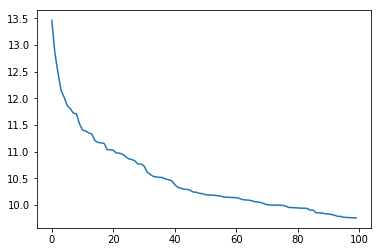

In [78]:
plt.plot(x, np.log(frequiences))

In [48]:
def prob_1word(word):
        return words_count[word] / len(Token)

In [50]:
prob_1word("我们")

NameError: name 'words_count' is not defined

In [84]:
Token[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [87]:
Token = [str(t) for t in Token]

In [88]:
Token[:10]

['此外', '自', '本周', '6', '月', '12', '日起', '除', '小米', '手机']

In [89]:
Token_2_Gram = [''.join(Token[i:i+2]) for i in range(len(Token[:-2]))]

In [91]:
Token_2_Gram[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [92]:
words_count_2 = Counter(Token_2_Gram)

In [94]:
def prob_2words(word1, word2):
    if word1 + word2 in words_count_2:
        return words_count_2[word1+word2] / len(Token_2_Gram)
    else:
        return 1 / len(Token_2_Gram)    

In [98]:
prob_2words('我们','在')

3.0536514065072974e-05

In [99]:
prob_2words('在','吃饭')

2.8379659911777854e-07

In [46]:
def get_probablity(sentence):
    words = cut(sentence)
    sentence_prob = 1 
    for i, word in enumerate(words[:-1]):
        next_ = words[i+1]
        probability = prob_2words(word, next_)
        sentence_prob *= probability
    sentence_prob *prob_1word(words[-1])
    return sentence_prob

In [47]:
get_probablity('小明今天抽奖抽到一台苹果手机')

NameError: name 'prob_2words' is not defined

In [155]:
get_probablity('洋葱奶昔来一杯')

1.8285698188632354e-22

In [156]:
get_probablity('养乐多绿来一杯')

3.2216203868326836e-15

In [157]:
host

'\nhost = 寒暄 报数 询问 业务相关 结尾 \n报数 = 我是 数字 号 ,\n数字 = 单个数字 | 数字 单个数字 \n单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 \n寒暄 = 称谓 打招呼 | 打招呼\n称谓 = 人称 ,\n人称 = 先生 | 女士 | 小朋友\n打招呼 = 你好 | 您好 \n询问 = 请问你要 | 您需要\n业务相关 = 玩玩 具体业务\n玩玩 = null\n具体业务 = 喝酒 | 打牌 | 打猎 | 赌博\n结尾 = 吗？\n'

In [160]:
for sen in [generate_by_str(host,  target="host",split='=') for i in range(10)]:
    print('sentence: {} with Prb: {}'.format(sen, get_probablity(sen)))

host  : [['寒暄', '报数', '询问', '业务相关', '结尾']]
报数  : [['我是', '数字', '号', ',']]
数字  : [['单个数字'], ['数字', '单个数字']]
单个数字  : [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]
寒暄  : [['称谓', '打招呼'], ['打招呼']]
称谓  : [['人称', ',']]
人称  : [['先生'], ['女士'], ['小朋友']]
打招呼  : [['你好'], ['您好']]
询问  : [['请问你要'], ['您需要']]
业务相关  : [['玩玩', '具体业务']]
玩玩  : [['null']]
具体业务  : [['喝酒'], ['打牌'], ['打猎'], ['赌博']]
结尾  : [['吗？']]
expr ['寒暄', '报数', '询问', '业务相关', '结尾']
expr ['称谓', '打招呼']
expr ['人称', ',']
expr ['小朋友']
expr ['你好']
expr ['我是', '数字', '号', ',']
expr ['单个数字']
expr ['1']
expr ['请问你要']
expr ['玩玩', '具体业务']
expr ['null']
expr ['喝酒']
expr ['吗？']
host  : [['寒暄', '报数', '询问', '业务相关', '结尾']]
报数  : [['我是', '数字', '号', ',']]
数字  : [['单个数字'], ['数字', '单个数字']]
单个数字  : [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']]
寒暄  : [['称谓', '打招呼'], ['打招呼']]
称谓  : [['人称', ',']]
人称  : [['先生'], ['女士'], ['小朋友']]
打招呼  : [['你好'], ['您好']]
询问  : [['请问你要'], ['您需要']]
业务相关  : [['玩玩', '具体业务']]
玩玩  : [['null']]
具体业务  : [['喝

In [161]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]

for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = get_probablity(s1), get_probablity(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.8889745916921315e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.5111796733537052e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.5242555959271015e-34
---- 真是一只好看的小猫 with probility 7.970947520145384e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.401139863085618e-20
---- 今晚火锅去吃我 with probility 5.396995716765105e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.8285698188632354e-22
---- 养乐多绿来一杯 with probility 3.2216203868326836e-15
